# Вариант 4

Локализовать корни уравнения $4х^3 + 8.6х^2 - 10.4х - 17.25 = 0$ и решить его методами простой итерации и Ньютона с точностью $10^{-4}$. Проверить сходимость метода простой итерации, оценить необходимое число итераций и сравнить его с получившимся числом по обоим методам. Выбрать критерий останова, найти точное решение, построить график ошибки, критерия останова и значения решения на каждой итерации.

Локализуем корни уравнения

In [1]:
function f(x)
    return (4 * (x^3)) + (8.6 * (x^2)) - (10.4 * x) - 17.52 
end

function df(x) # Производная функции уравнения
    return (12 * (x^2)) + (17.2 * x) - 10.4
end

function ddf(x) # Вторая производная
    return (24 * x) + 17.2
end

const ϵ = 10 ^ (-4) # Точность

0.0001

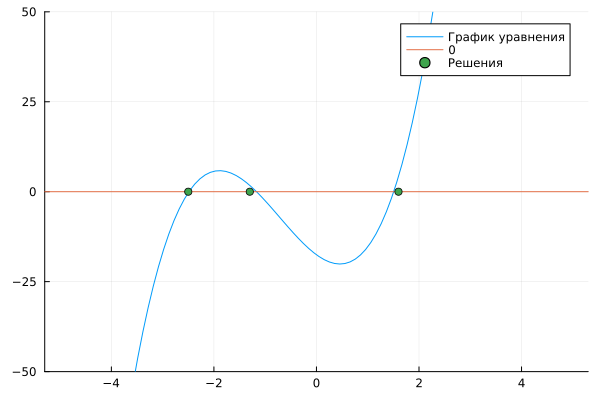

In [2]:
using Plots

x = range(-5, 5, 100)
plot(x, f.(x), ylims=(-50, 50), label="График уравнения")
hline!([0], label="0")
scatter!([-2.5, -1.3, 1.6], [0, 0, 0], label="Решения")

Выбираем на глаз начальное приближение  $х_0 = (-2.5, -1.3, 1.6)$; корни 1, 2 и 3 соответственно.

In [3]:
χ = [-2.5, -1.3, 1.6]

3-element Vector{Float64}:
 -2.5
 -1.3
  1.6

In [4]:
for i ∈ χ
    println(f(i))
end

-0.2699999999999996
1.7459999999999987
4.2400000000000055


За исключением первого, не очень точные решения.

## Метод простой итерации

Будем использовать метод простой итерации в виде метода релаксации.

\begin{equation*}
    f(x) = 0 \iff x = \varphi(x) \\
    \text{Где} \varphi(x) = x + \tau f(x)
\end{equation*}

Если производная $\varphi '(x)$ удволетворяет следующему условию:

\begin{equation*}
    |\varphi '(x)| = |1 + \tau f'(x)| \le q < 1
\end{equation*}

То метод простой итерации сходится. Пользуясь этим условием мы можем найти параметр $\tau$:

\begin{equation*}
    -2 < \tau f'(x) < 0
\end{equation*}

То есть, $\tau$ находится ближе у нулю, чем $-\frac{2}{f'(x)}$.

Будем считать $\tau$ как $\pm \frac{2}{M+m}$, где:

\begin{equation*}
    0 < m < |f'(x)| < M
\end{equation*}

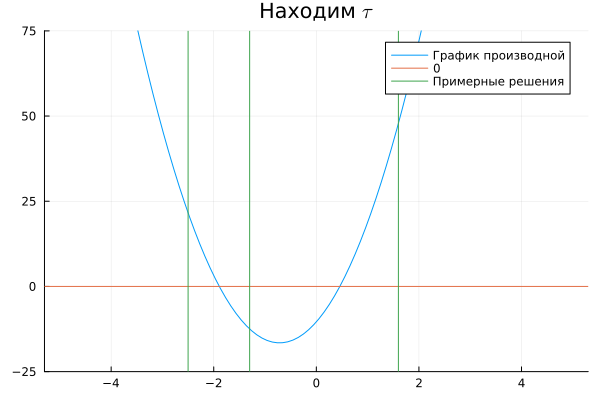

In [5]:
using LaTeXStrings
plot(x, df.(x), ylims=(-25, 75), title=L"Находим $\tau$", label="График производной")
hline!([0], label="0")
vline!([-2.5, -1.3, 1.6], label="Примерные решения")

In [6]:
m = 5
M = 50
t = 2 / (M+m)

0.03636363636363636

In [7]:
const τ = [-t, t, -t]

3-element Vector{Float64}:
 -0.03636363636363636
  0.03636363636363636
 -0.03636363636363636

Число итераций дается формулой: 

\begin{equation*}
k = \frac{ln(\frac{1}{\varepsilon})}{ln(\frac{1}{q})}
\end{equation*}

Найдем q:

In [8]:
println("Для корня 1 q = $(abs(1 + (τ[1]*df(χ[1]))))")
println("Для корня 2 q = $(abs(1 + (τ[2]*df(χ[2]))))")
println("Для корня 3 q = $(abs(1 + (τ[3]*df(χ[3]))))")

Для корня 1 q = 0.21454545454545448
Для корня 2 q = 0.5461818181818183
Для корня 3 q = 0.7396363636363639


In [9]:
const q = [0.21454545454545448, 0.5461818181818183, 0.7396363636363639]

3-element Vector{Float64}:
 0.21454545454545448
 0.5461818181818183
 0.7396363636363639

Оценим число итераций для нахождения каждого корня.

In [10]:
k(q) = round(log(1/ϵ) / log(1/q)) 

println("Для корня 1 число итераций = $(k(q[1]))")
println("Для корня 2 число итераций = $(k(q[2]))")
println("Для корня 3 число итераций = $(k(q[3]))")

Для корня 1 число итераций = 6.0
Для корня 2 число итераций = 15.0
Для корня 3 число итераций = 31.0


Выберем критерий останова и проведем итерацию:

\begin{equation*}
    ||x_{k+1} - x_k|| \le 10^{-4} \\
\end{equation*}

\begin{equation*}
    x_{x+1} = \varphi(x_k)
\end{equation*}

In [11]:
φ_1(x) = x + (τ[1] * f(x))
φ_2(x) = x + (τ[2] * f(x))
φ_3(x) = x + (τ[3] * f(x))

# Число итераций
c = [0, 0, 0]

# Значения решений на каждой итерации
er1 = [χ[1]]
er2 = [χ[2]]
er3 = [χ[3]]

# Итерация
while abs(φ_1(χ[1]) - χ[1]) >= ϵ
    χ[1] = φ_1(χ[1])
    append!(er1, χ[1])
    c[1] += 1
end

while abs(φ_2(χ[2]) - χ[2]) >= ϵ
    χ[2] = φ_2(χ[2])
    append!(er2, χ[2])
    c[2] += 1
end

while abs(φ_3(χ[3]) - χ[3]) >= ϵ
    χ[3] = φ_3(χ[3])
    append!(er3, χ[3])
    c[3] += 1
end

print("Ответ: $χ")

Ответ: [-2.4873776595156074, -1.1691109540799867, 1.506295865382548]

Число итераций:

In [12]:
for i ∈ c 
    println(i)
end

4
10
13


На деле понадобилось меньше циклов итерации.

In [13]:
for i ∈ χ
    println(f(i))
end

-0.0007589238534180254
0.0015506448768007886
-0.001999940863566252


Решения стали гораздо точнее.

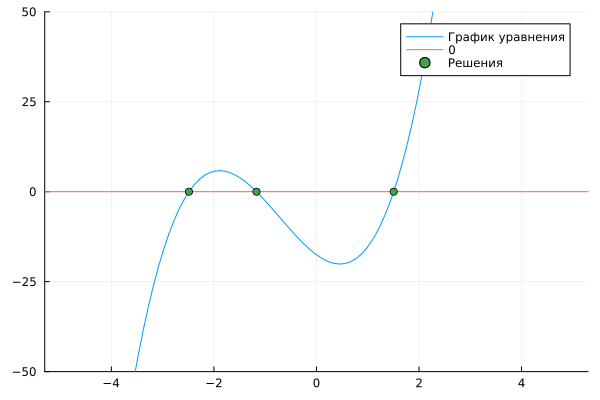

In [14]:
plot(x, f.(x), ylims=(-50, 50), label="График уравнения")
hline!([0], label="0")
scatter!(χ, [0, 0, 0], label="Решения")

### Построим графики решений:

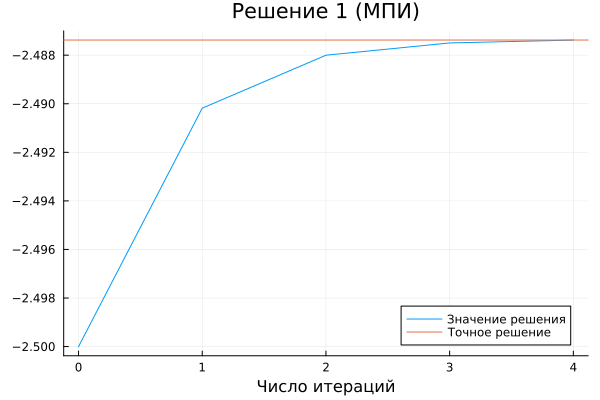

In [15]:
plot(0:c[1], er1, title="Решение 1 (МПИ)", label="Значение решения")
hline!([χ[1]], label="Точное решение")
xlabel!("Число итераций")

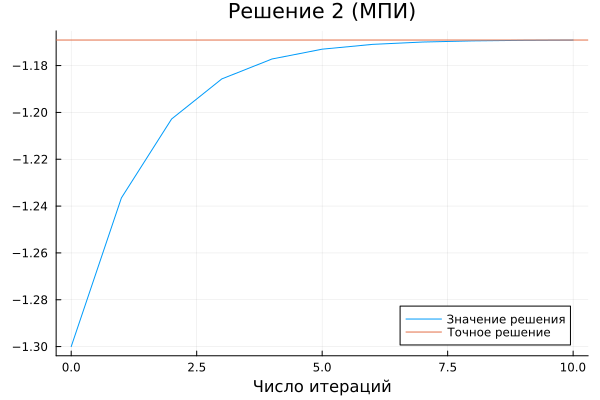

In [16]:
plot(0:c[2], er2, title="Решение 2 (МПИ)", label="Значение решения")
hline!([χ[2]], label="Точное решение")
xlabel!("Число итераций")

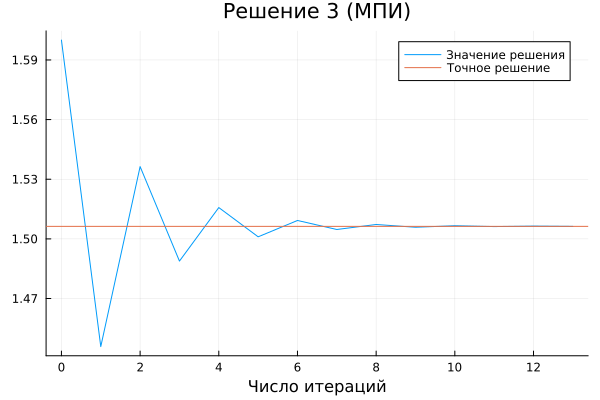

In [17]:
plot(0:c[3], er3, title="Решение 3 (МПИ)", label="Значение решения")
hline!([χ[3]], label="Точное решение")
xlabel!("Число итераций")

### Построим графики ошибок и критерия останова:

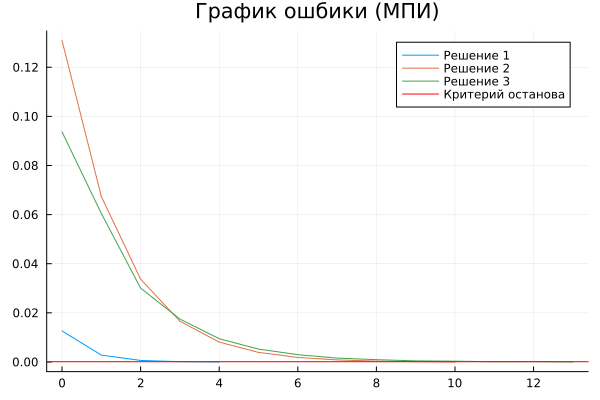

In [18]:
plot(0:c[1], abs.(er1 .- χ[1]), title="График ошбики (МПИ)", label="Решение 1")
plot!(0:c[2], abs.(er2 .- χ[2]), label="Решение 2")
plot!(0:c[3], abs.(er3 .- χ[3]), label="Решение 3")
hline!([ϵ], label="Критерий останова", color="red")

## Метод Ньютона

Метод Ньютона --- частный случай метода релаксации, где $\varphi(x) = 0$; и соответственно:

\begin{equation*}
    \tau = - \frac{1}{f'(x)}
\end{equation*}

In [19]:
N(x) = x - (f(x)/df(x))

N (generic function with 1 method)

Решим уравнение методом Ньютона.

In [20]:
χ = [-2.5, -1.3, 1.6]

# Число итераций
c = [0, 0, 0]

# Значения решений на каждой итерации
er1 = [χ[1]]
er2 = [χ[2]]
er3 = [χ[3]]

# Итерация
while abs(N(χ[1]) - χ[1]) >= ϵ
    χ[1] = N(χ[1])
    append!(er1, χ[1])
    c[1] += 1
end

while abs(N(χ[2]) - χ[2]) >= ϵ
    χ[2] = N(χ[2])
    append!(er2, χ[2])
    c[2] += 1
end

while abs(N(χ[3]) - χ[3]) >= ϵ
    χ[3] = N(χ[3])
    append!(er3, χ[3])
    c[3] += 1
end

print("Ответ: $χ")

Ответ: [-2.487341650102352, -1.168971131586472, 1.506358370652605]

Число итераций:

In [21]:
for i ∈ c 
    println(i)
end

2
2
2


Как мы видим, метод Ньютона выдал решения за значительно меньшее число итераций.

In [22]:
for i ∈ χ
    println(f(i))
end

-5.328212715483005e-7
-0.00042191806462454906
0.0006713520552672492


Сами решения также более точные.

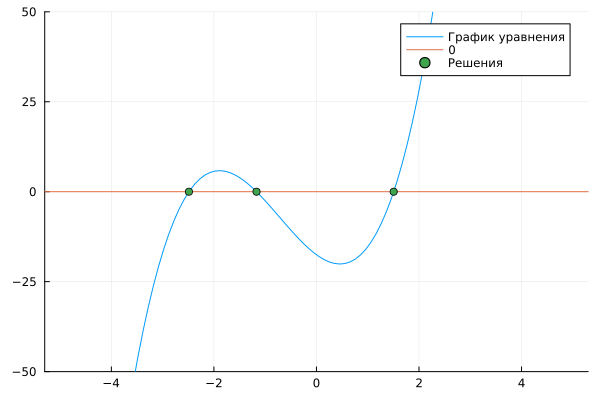

In [23]:
plot(x, f.(x), ylims=(-50, 50), label="График уравнения")
hline!([0], label="0")
scatter!(χ, [0, 0, 0], label="Решения")

### Построим графики решенмя:

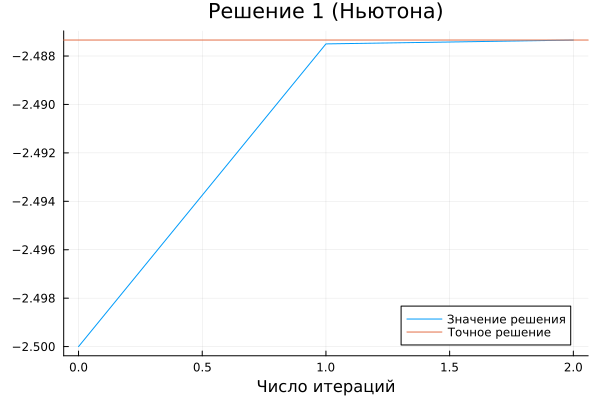

In [24]:
plot(0:c[1], er1, title="Решение 1 (Ньютона)", label="Значение решения")
hline!([χ[1]], label="Точное решение")
xlabel!("Число итераций")

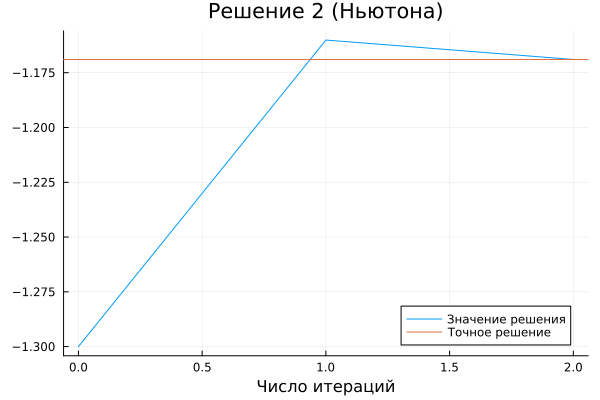

In [25]:
plot(0:c[2], er2, title="Решение 2 (Ньютона)", label="Значение решения")
hline!([χ[2]], label="Точное решение")
xlabel!("Число итераций")

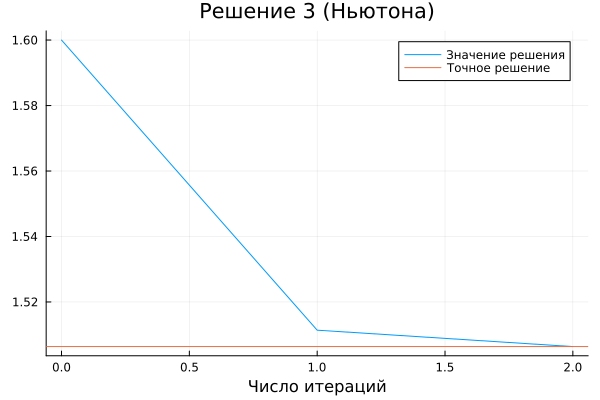

In [26]:
plot(0:c[3], er3, title="Решение 3 (Ньютона)", label="Значение решения")
hline!([χ[3]], label="Точное решение")
xlabel!("Число итераций")

### Построим графики ошибок и критерия останова:

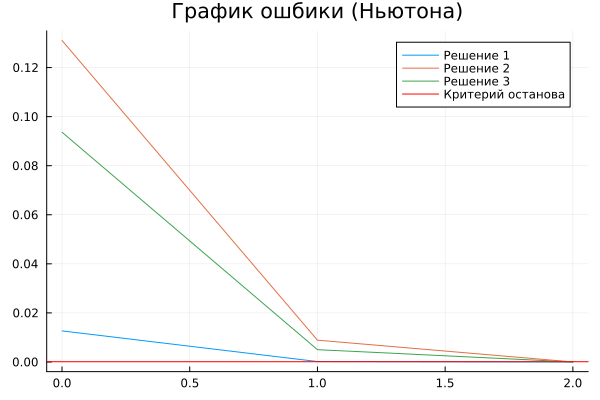

In [27]:
plot(0:c[1], abs.(er1 .- χ[1]), title="График ошбики (Ньютона)", label="Решение 1")
plot!(0:c[2], abs.(er2 .- χ[2]), label="Решение 2")
plot!(0:c[3], abs.(er3 .- χ[3]), label="Решение 3")
hline!([ϵ], label="Критерий останова", color="red")

## Метод Третьего порядка

Метод третьего порядка имеет следующий вид:

\begin{equation*}
    \varphi(x) = x - \frac{f(x)}{f'(x)} - \frac{f^{''}(x) f^{2}(x)}{2(f^{'}(x))^3}
\end{equation*}

In [28]:
function T(x)
    nom = ddf(x) * (f(x)^2)
    denom = 2 * (df(x)^3)
    return N(x) - (nom/denom)
end

T (generic function with 1 method)

In [29]:
χ = [-2.5, -1.3, 1.6]

# Число итераций
c = [0, 0, 0]

# Значения решений на каждой итерации
er1 = [χ[1]]
er2 = [χ[2]]
er3 = [χ[3]]

# Итерация
while abs(T(χ[1]) - χ[1]) >= ϵ
    χ[1] = T(χ[1])
    append!(er1, χ[1])
    c[1] += 1
end

while abs(T(χ[2]) - χ[2]) >= ϵ
    χ[2] = T(χ[2])
    append!(er2, χ[2])
    c[2] += 1
end

while abs(T(χ[3]) - χ[3]) >= ϵ
    χ[3] = T(χ[3])
    append!(er3, χ[3])
    c[3] += 1
end

print("Ответ: $χ")

Ответ: [-2.487345196759259, -1.169001042622549, 1.5063426622917677]

Число итераций:

In [30]:
for i ∈ c 
    println(i)
end

1
2
2


Итераций потребоваль ещё меньше, чем в методе Ньютона: 1-е решения находится в 1 шаг.

Точные решения:

In [31]:
for i ∈ χ
    println(f(i))
end

-7.52261987955194e-5
7.338391938560562e-8
2.9236524312636902e-9


2-е и 3-е решение также получилось более точными, чем в методе Ньютона. 1-е получилось менее точным; вероятно, потому что для удволетворения критерия останова хватило одной итерации, в то время как метод ньютона за первую итерацию приблизлся близко к критерию останова, а за вторую приблизился ближе к истинному решению, чем метод 3-го порядка.

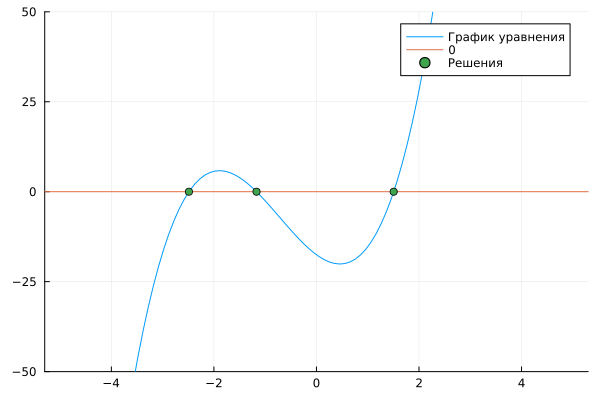

In [32]:
plot(x, f.(x), ylims=(-50, 50), label="График уравнения")
hline!([0], label="0")
scatter!(χ, [0, 0, 0], label="Решения")

### Построим графики решенмя:

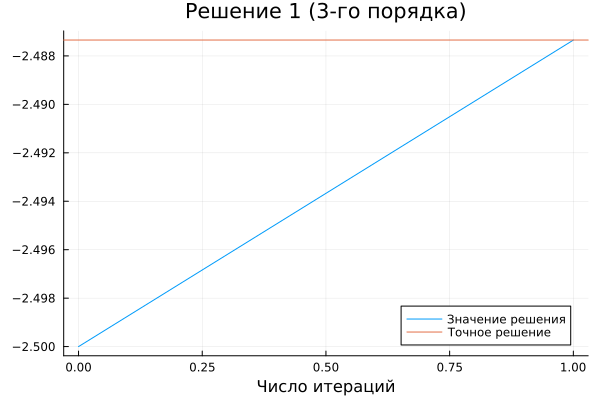

In [33]:
plot(0:c[1], er1, title="Решение 1 (3-го порядка)", label="Значение решения")
hline!([χ[1]], label="Точное решение")
xlabel!("Число итераций")

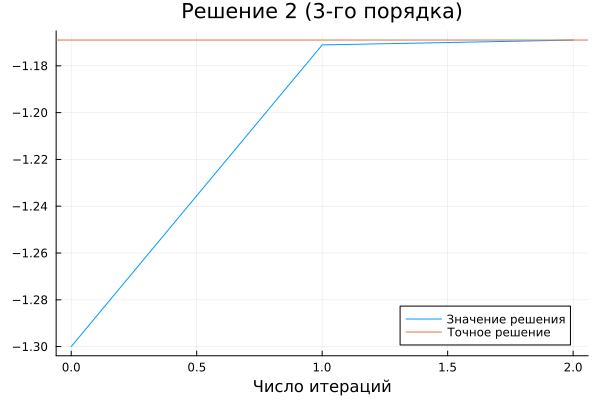

In [34]:
plot(0:c[2], er2, title="Решение 2 (3-го порядка)", label="Значение решения")
hline!([χ[2]], label="Точное решение")
xlabel!("Число итераций")

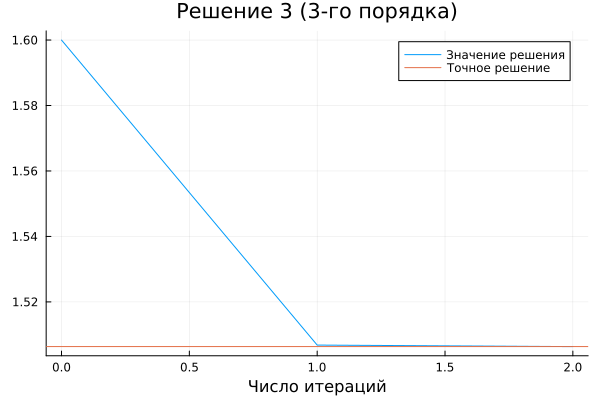

In [35]:
plot(0:c[3], er3, title="Решение 3 (3-го порядка)", label="Значение решения")
hline!([χ[3]], label="Точное решение")
xlabel!("Число итераций")

### Построим графики ошибок и критерия останова:

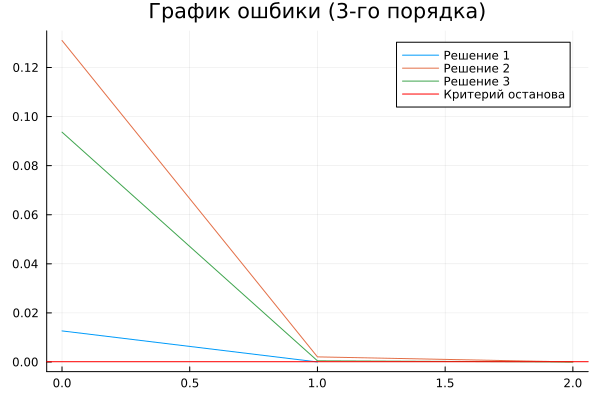

In [36]:
plot(0:c[1], abs.(er1 .- χ[1]), title="График ошбики (3-го порядка)", label="Решение 1")
plot!(0:c[2], abs.(er2 .- χ[2]), label="Решение 2")
plot!(0:c[3], abs.(er3 .- χ[3]), label="Решение 3")
hline!([ϵ], label="Критерий останова", color="red")

## Сравним скорость методов

Гипотетически, метод Ньютона должен быть самым быстрым --- у него же примерно столько же циклов итерации, как у метода третьеги порядка, при том, что его алгоритм проще.

In [37]:
mean(x) = sum(x)/length(x)

function sim(χ) # Метод простой итерации
    while abs(φ_1(χ[1]) - χ[1]) >= ϵ
        χ[1] = φ_1(χ[1])
    end
    
    while abs(φ_2(χ[2]) - χ[2]) >= ϵ
        χ[2] = φ_2(χ[2])
    end
    
    while abs(φ_3(χ[3]) - χ[3]) >= ϵ
        χ[3] = φ_3(χ[3])
    end
end

function newton(χ) # Метод ньютона
    while abs(N(χ[1]) - χ[1]) >= ϵ
        χ[1] = N(χ[1])
    end

    while abs(N(χ[2]) - χ[2]) >= ϵ
        χ[2] = N(χ[2])
    end

    while abs(N(χ[3]) - χ[3]) >= ϵ
        χ[3] = N(χ[3])
    end
end  

function third(χ) # Метод третьего порядка
    while abs(T(χ[1]) - χ[1]) >= ϵ
        χ[1] = T(χ[1])
    end
    
    while abs(T(χ[2]) - χ[2]) >= ϵ
        χ[2] = T(χ[2])
    end
    
    while abs(T(χ[3]) - χ[3]) >= ϵ
        χ[3] = T(χ[3])
    end
end

third (generic function with 1 method)

In [38]:
a = [0.0]

for _ ∈ 1:1000000
    χ = [-2.5, -1.3, 1.6]
    time = @elapsed sim(χ)
    append!(a, [time])
end

mean(a)

1.5376571423428597e-7

In [39]:
a = [0.0]

for _ ∈ 1:1000000
    χ = [-2.5, -1.3, 1.6]
    time = @elapsed newton(χ)
    append!(a, [time])
end

mean(a)

5.254182145817861e-8

In [40]:
a = [0.0]

for _ ∈ 1:1000000
    χ = [-2.5, -1.3, 1.6]
    time = @elapsed third(χ)
    append!(a, [time])
end

mean(a)

7.366883933116076e-8

Интуиция оказалась неверной: метод Ньютона оказался медленнее метода простой итерации, а метод третьего порядка оказался самым медленным. Из этого можно сделать вывод, что (по крайней мере для данной задачи и начального приблежения) простые алгоритмы имеют преимущество в плане скорости, даже если требуют большего числа итераций.